# <font color=blue>Assignments for "Feature Engineering - Part 2"</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In this assignment, you are going to use a dataset related to the US education system. Please download the ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)) from Kaggle. You are going to use `states_all.csv` within this dataset.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.


In [2]:
df = pd.read_csv('states_all.csv')

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [4]:
df.dropna(inplace=True)

**(1)** Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [5]:
df['WEIGHTED_AVG'] = ((df['GRADES_4_G'] * ((df['AVG_MATH_4_SCORE'] + df['AVG_READING_4_SCORE']) / 2)) + (df['GRADES_8_G'] * ((df['AVG_MATH_8_SCORE'] + df['AVG_READING_8_SCORE']) / 2))) / (df['GRADES_4_G'] + df['GRADES_8_G'])

In [6]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WEIGHTED_AVG
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,236.675051
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,246.085039
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,241.024367
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,242.585939
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,237.893897


**(2)** What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?

In [7]:
df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
    'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'WEIGHTED_AVG']].corr()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,WEIGHTED_AVG
TOTAL_EXPENDITURE,1.000000,0.989244,0.993013,0.941769,0.926622,0.031821
INSTRUCTION_EXPENDITURE,0.989244,1.000000,0.973395,0.896064,0.881202,0.050260
SUPPORT_SERVICES_EXPENDITURE,0.993013,0.973395,1.000000,0.949354,0.913650,0.036458
OTHER_EXPENDITURE,0.941769,0.896064,0.949354,1.000000,0.924006,-0.036248
CAPITAL_OUTLAY_EXPENDITURE,0.926622,0.881202,0.913650,0.924006,1.000000,-0.062564
WEIGHTED_AVG,0.031821,0.050260,0.036458,-0.036248,-0.062564,1.000000


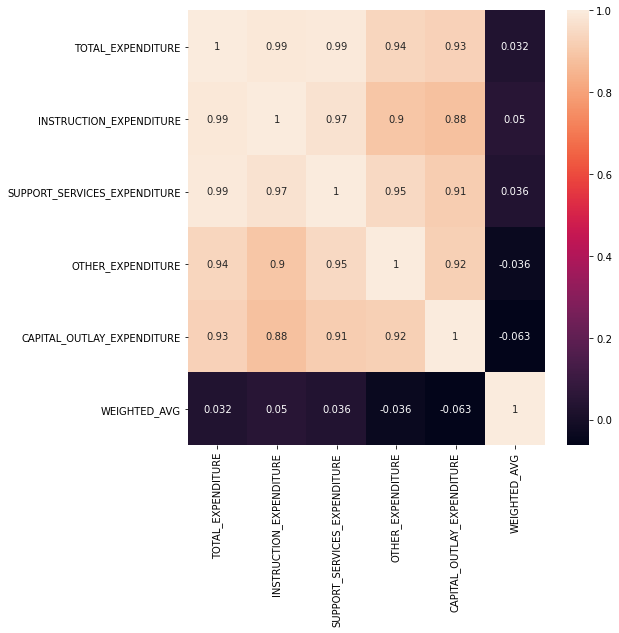

In [8]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
    'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'WEIGHTED_AVG']].corr(), annot=True)
plt.show()

Instruction expenditure has the highest correlation.

**(3)** Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [9]:
expenditures = df[['INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
                   'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].values

In [10]:
X = StandardScaler().fit_transform(expenditures)
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)

In [11]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.94233335 0.03503443 0.0190434  0.00358882]
[94.23 97.73 99.63 99.99]


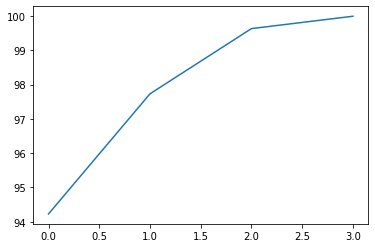

In [12]:
plt.plot(cumsum_var);

**94.23%** of the total variance can be explained by the first component.

**(4)** What is the correlation between the GPA you created and the first principal component?

In [13]:
first_pc = pd.Series(pd.DataFrame(principalComponents).iloc[:,0], name='first_pc')

In [14]:
first_pc

0     -0.708680
1     -1.370094
2     -0.613472
3     -1.137075
4      7.749451
         ...   
350    0.581372
351    0.442803
352   -1.057644
353    0.018448
354   -1.304052
Name: first_pc, Length: 355, dtype: float64

In [15]:
pd.concat([df['WEIGHTED_AVG'].reset_index(drop=True), first_pc], axis=1).corr()

,WEIGHTED_AVG,first_pc
WEIGHTED_AVG,1.000000,-0.002786
first_pc,-0.002786,1.000000


**(5)** When you need to choose the most appropriate variables for your model, would you prefer the first basic variables instead of the expenditure items? Why?

The first basic variables had a greater correlation with the WEIGHTED_AVG variable. However, since they had much higher correlation within themselves, in order to avoid multicollinearity, I would probably choose the first principal component.